html 파일에 저장했습니다.


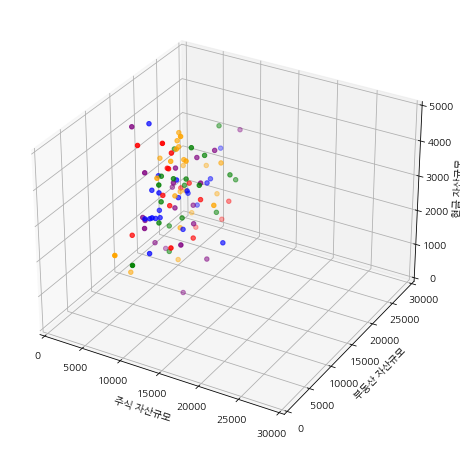

In [13]:
import base64
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from io import BytesIO
# import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumGothic')

# 데이터 생성 함수 정의
def generate_data(n):
    ages = ['20대', '30대', '40대', '50대', '60대 이상']
    age_colors = ['blue', 'green', 'orange', 'red', 'purple']
    age_to_color = {age: color for age, color in zip(ages, age_colors)}
    
    stock_mean = 5000  # 주식 자산 평균
    real_estate_mean = 20000  # 부동산 자산 평균
    cash_mean = 2000  # 현금 자산 평균

    stock_std = 2000  # 주식 자산 표준편차
    real_estate_std = 5000  # 부동산 자산 표준편차
    cash_std = 1000  # 현금 자산 표준편차

    # 주식, 부동산, 현금 자산규모에 따른 데이터 생성
    stocks =np.random.normal(stock_mean, stock_std, n)  # 주식 자산규모
    realestates = np.random.normal(real_estate_mean, real_estate_std, n)  # 부동산 자산규모
    cashs = np.random.normal(cash_mean, cash_std, n) # 현금 자산규모

    # 연령대 및 색상 설정
    ages_data = np.random.choice(ages, size=n)
    colors = [age_to_color[age] for age in ages_data]

    return stocks, realestates, cashs, colors

# Figure 및 Axes 생성
fig = plt.figure(figsize=(10, 8))  # 그래프의 사이즈를 2배로 키웁니다.
ax = fig.add_subplot(111, projection='3d')

# 초기 데이터 플로팅
sc = ax.scatter([], [], [], c='b')

# 초기 설정
ax.set_xlim(0, 30000)
ax.set_ylim(0, 30000)
ax.set_zlim(0, 5000)
ax.set_xlabel('주식 자산규모')
ax.set_ylabel('부동산 자산규모')
ax.set_zlabel('현금 자산규모')

# 애니메이션 초기화 함수
def init():
    sc._offsets3d = ([], [], [])
    return sc,

# 애니메이션 업데이트 함수
def update(frame):
    # frame 번째까지의 데이터로 업데이트
    stocks, realestates, cashs, colors = generate_data(frame)
    sc._offsets3d = (stocks, realestates, cashs)
    sc.set_color(colors)
    return sc,

# 애니메이션 생성
n = 100  # 조사 인원 수
ani = FuncAnimation(fig, update, frames=n, init_func=init, blit=True, interval=10) # 100밀리초로 설정하여 점을 느리게 찍도록 설정

# 애니메이션을 GIF로 저장
gif_path = 'sequential_points.gif'
ani.save(gif_path, writer='pillow', fps=10)

# GIF를 base64로 인코딩
with open(gif_path, "rb") as f:
    gif_bytes = f.read()
gif_encode_bs64 = base64.b64encode(gif_bytes).decode('utf-8')

# HTML 문자열 생성
html_string = """
<h2>연령별 자산규모 벡터 스페이스</h2>
<img src='data:image/gif;base64,{}'/>
""".format(gif_encode_bs64)

# HTML 파일 작성
with open("연령별 자산규모 벡터 스페이스.html", "w") as f:
    f.write(html_string)

print("html 파일에 저장했습니다.")